In [ ]:
import pandas as pd
import json

# load archive
try:
  df = pd.read_csv("proyecto_limpio.csv", sep=";")
  print("CSV cargado exitosamente.")
  print(df.head())
except FileNotFoundError:
  print("Error: El archivo 'original_limpio.csv' no fue encontrado.")
except Exception as e:
  print(f"Ocurrió un error al cargar el CSV: {e}")

# load JSON
try:
  with open("variables_info.json", "r") as f:
    variables_info = json.load(f)
  print("\nJSON cargado exitosamente.")
  print(variables_info)
except FileNotFoundError:
  print("Error: El archivo 'variables_info.json' no fue encontrado.")
except json.JSONDecodeError:
  print("Error: No se pudo decodificar el archivo JSON.")
except Exception as e:
  print(f"Ocurrió un error al cargar el JSON: {e}")

CSV cargado exitosamente.
   Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0               4.0           0                      4.0            6.0   
1               9.0           1                      0.0            0.0   
2               9.0           1                      1.0            2.0   
3               0.0           0                      6.0            7.0   
4               3.0           0                      9.0            4.0   

   Drained_after_socializing  Friends_circle_size  Post_frequency  Personality  
0                          0                 13.0             5.0            0  
1                          1                  0.0             3.0            1  
2                          1                  5.0             2.0            1  
3                          0                 14.0             8.0            0  
4                          0                  8.0             5.0            0  

JSON cargado exitosamente.
{'numeric

In [ ]:
df.describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000
mean,4.232128,0.436749,4.200867,3.192954,0.435949,6.580130,3.815283,0.438351
std,3.406630,0.496083,2.874305,2.218807,0.495980,4.257516,2.914253,0.496284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,3.000000,0.000000,4.000000,3.000000,0.000000,6.000000,3.000000,0.000000
75%,7.000000,1.000000,7.000000,5.000000,1.000000,10.000000,6.000000,1.000000
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.000000


In [ ]:
# Normalize all variables to the range [0,1] using MinMaxScaler, and save a new file

from sklearn.preprocessing import MinMaxScaler

# Identify the variables to normalize (all columns except the index if it exists)
# In this case, we assume that all columns in the loaded DataFrame are numeric and should be normalized.
# If there are non-numeric columns or columns that should not be normalized, you should exclude them.
variables_a_normalizar = df.columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to the selected variables
df[variables_a_normalizar] = scaler.fit_transform(df[variables_a_normalizar])

print("\nNormalized DataFrame:")
print(df.head())

# Save the normalized DataFrame to a new CSV file
try:
  df.to_csv("original_normalizado.csv", sep=";", index=False)
  print("\nNormalized DataFrame saved as 'original_normalizado.csv'.")
except Exception as e:
  print(f"An error occurred while saving the normalized file: {e}")

df.describe()



DataFrame normalizado:
   Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0          0.363636         0.0                      0.4       0.857143   
1          0.818182         1.0                      0.0       0.000000   
2          0.818182         1.0                      0.1       0.285714   
3          0.000000         0.0                      0.6       1.000000   
4          0.272727         0.0                      0.9       0.571429   

   Drained_after_socializing  Friends_circle_size  Post_frequency  Personality  
0                        0.0             0.866667             0.5          0.0  
1                        1.0             0.000000             0.3          1.0  
2                        1.0             0.333333             0.2          1.0  
3                        0.0             0.933333             0.8          0.0  
4                        0.0             0.533333             0.5          0.0  

DataFrame normalizado guardado en 'ori

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000
mean,0.384739,0.436749,0.420087,0.456136,0.435949,0.438675,0.381528,0.438351
std,0.309694,0.496083,0.287431,0.316972,0.495980,0.283834,0.291425,0.496284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090909,0.000000,0.200000,0.142857,0.000000,0.200000,0.100000,0.000000
50%,0.272727,0.000000,0.400000,0.428571,0.000000,0.400000,0.300000,0.000000
75%,0.636364,1.000000,0.700000,0.714286,1.000000,0.666667,0.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Matriz de Loadings:
                              PC1       PC2       PC3       PC4       PC5
Time_spent_Alone        -0.468556 -0.201383  0.852196 -0.082593  0.082709
Social_event_attendance  0.428628  0.237643  0.174695 -0.603417  0.604296
Going_outside            0.486763 -0.449545  0.182886  0.612531  0.390295
Friends_circle_size      0.414229  0.630909  0.441836  0.261955 -0.408078
Post_frequency           0.433832 -0.550303  0.120735 -0.430408 -0.555993


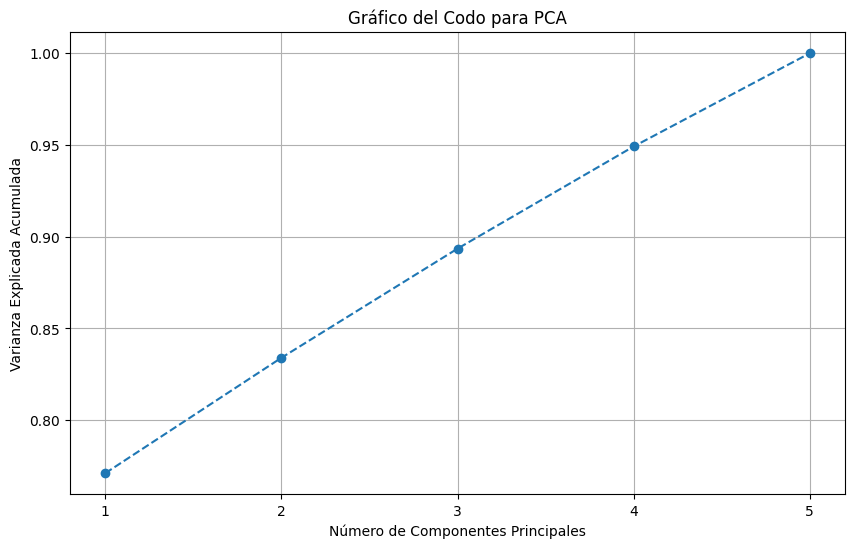


Nuevo dataset con las 2 mejores componentes principales y variables categóricas:
        PC1       PC2  Stage_fear  Drained_after_socializing  Personality
0  0.425156  0.024034         0.0                        0.0          0.0
1 -0.822265 -0.213964         1.0                        1.0          1.0
2 -0.545634 -0.053308         1.0                        1.0          1.0
3  0.908568 -0.042458         0.0                        0.0          0.0
4  0.404915  0.079302         0.0                        0.0          0.0

Nuevo dataset guardado en 'dataset_pca_2_components.csv'.


In [ ]:
# Take the previously detected numeric columns from the file
# , apply PCA to n dimensions. Create a new dataset with the transformed variables, keeping the categorical ones
# The numeric variables are in the file variables_info.json, named numeric_variables, and the categorical ones are categorical_variables
# also calculate the loadings matrix
# and generate the corresponding elbow plot
# the saved file should only contain the 2 best components

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Make sure variables_info and df are loaded from the previous code

# Get numeric and categorical variables
numeric_variables = variables_info.get("numeric_variables", [])
categorical_variables = variables_info.get("categorical_variables", [])

# Check if there are numeric variables to apply PCA
if not numeric_variables:
  print("No numeric variables were found in the file variables_info.json.")
else:
  # Separate numeric variables to apply PCA
  df_numeric = df[numeric_variables]

  # Apply PCA to n dimensions (initially, use all possible dimensions for the elbow plot)
  # For the elbow plot, we fit PCA with the number of components equal to the number of numeric variables
  n_components = len(numeric_variables)
  pca = PCA(n_components=n_components)
  pca.fit(df_numeric)

  # Calculate the loadings matrix
  loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_components)], index=numeric_variables)
  print("\nLoadings Matrix:")
  print(loadings)

  # Generate the elbow plot
  plt.figure(figsize=(10, 6))
  plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
  plt.title('Elbow Plot for PCA')
  plt.xlabel('Number of Principal Components')
  plt.ylabel('Cumulative Explained Variance')
  plt.xticks(range(1, n_components + 1))
  plt.grid(True)
  plt.show()

  # Now apply PCA to obtain the 2 best components
  pca_2_components = PCA(n_components=2)
  df_pca_transformed = pca_2_components.fit_transform(df_numeric)

  # Create a DataFrame with the principal components
  df_pca_2 = pd.DataFrame(data=df_pca_transformed, columns=['PC1', 'PC2'])

  # Keep categorical variables and merge them with the principal components
  # Make sure df_pca_2 index matches df
  if categorical_variables and all(col in df.columns for col in categorical_variables):
      df_combined = pd.concat([df_pca_2, df[categorical_variables].reset_index(drop=True)], axis=1)
  else:
      # If there are no categorical variables or they are not found in the original DataFrame
      df_combined = df_pca_2

  print("\nNew dataset with the 2 best principal components and categorical variables:")
  print(df_combined.head())

  # Save the new dataset with the 2 best components to a CSV file
  try:
    df_combined.to_csv("dataset_pca_2_components.csv", sep=";", index=False)
    print("\nNew dataset saved as 'dataset_pca_2_components.csv'.")
  except Exception as e:
    print(f"An error occurred while saving the combined dataset file: {e}")


In [ ]:
# apply minmaxscaler to all data and create a new CSV file separated by ;

import pandas as pd
# Apply normalization to all columns in the DataFrame
# df is already loaded and contains the original data
scaler = MinMaxScaler()

# Apply normalization to all columns
df_normalized = scaler.fit_transform(df)

# Convert the normalized array back to a DataFrame
# Keep the original column names
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

print("\nNormalized DataFrame (all columns):")
print(df_normalized.head())

# Save the normalized DataFrame to a new CSV file separated by ;
try:
  df_normalized.to_csv("original_normalizado_all_columns.csv", sep=";", index=False)
  print("\nNormalized DataFrame (all columns) saved as 'original_normalizado_all_columns.csv'.")
except Exception as e:
  print(f"An error occurred while saving the normalized file (all columns): {e}")

df_normalized.describe()



DataFrame normalizado (todas las columnas):
   Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0          0.363636         0.0                      0.4       0.857143   
1          0.818182         1.0                      0.0       0.000000   
2          0.818182         1.0                      0.1       0.285714   
3          0.000000         0.0                      0.6       1.000000   
4          0.272727         0.0                      0.9       0.571429   

   Drained_after_socializing  Friends_circle_size  Post_frequency  Personality  
0                        0.0             0.866667             0.5          0.0  
1                        1.0             0.000000             0.3          1.0  
2                        1.0             0.333333             0.2          1.0  
3                        0.0             0.933333             0.8          0.0  
4                        0.0             0.533333             0.5          0.0  

DataFrame normali

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000
mean,0.384739,0.436749,0.420087,0.456136,0.435949,0.438675,0.381528,0.438351
std,0.309694,0.496083,0.287431,0.316972,0.495980,0.283834,0.291425,0.496284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090909,0.000000,0.200000,0.142857,0.000000,0.200000,0.100000,0.000000
50%,0.272727,0.000000,0.400000,0.428571,0.000000,0.400000,0.300000,0.000000
75%,0.636364,1.000000,0.700000,0.714286,1.000000,0.666667,0.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# aply describe in normalized dataframe 

df_normalized.describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000
mean,0.384739,0.436749,0.420087,0.456136,0.435949,0.438675,0.381528,0.438351
std,0.309694,0.496083,0.287431,0.316972,0.495980,0.283834,0.291425,0.496284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090909,0.000000,0.200000,0.142857,0.000000,0.200000,0.100000,0.000000
50%,0.272727,0.000000,0.400000,0.428571,0.000000,0.400000,0.300000,0.000000
75%,0.636364,1.000000,0.700000,0.714286,1.000000,0.666667,0.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# apply PCA on the numerical variables of the scaled dataframe and extract 3 components, keep the "Personality" variable, and create a new CSV

import pandas as pd
# Identify the numerical variables to apply PCA
# We use `numeric_variables` previously loaded from `variables_info.json`
if not numeric_variables:
    print("No numerical variables were found in the file variables_info.json.")
else:
    # Separate the normalized numerical variables
    # Ensure to use the normalized DataFrame (df_normalized)
    df_numeric_normalized = df_normalized[numeric_variables]

    # Apply PCA with 3 principal components
    n_components_pca = 3
    pca_3_components = PCA(n_components=n_components_pca)
    df_pca_transformed_3 = pca_3_components.fit_transform(df_numeric_normalized)

    # Create a DataFrame with the 3 principal components
    df_pca_3 = pd.DataFrame(data=df_pca_transformed_3, columns=[f'PC{i+1}' for i in range(n_components_pca)])

    # Keep the "Personality" variable
    # Check if "Personality" exists in the original DataFrame and include it
    if "Personality" in df.columns:
        df_personality = df["Personality"].reset_index(drop=True)
        # Combine the principal components with the "Personality" variable
        df_combined_pca_personality = pd.concat([df_pca_3, df_personality], axis=1)
        print("\nNew dataset with 3 principal components and the 'Personality' variable:")
        print(df_combined_pca_personality.head())

        # Create a new CSV with the combined DataFrame
        try:
            df_combined_pca_personality.to_csv("dataset_pca_3_components_personality.csv", sep=";", index=False)
            print("\nNew dataset saved as 'dataset_pca_3_components_personality.csv'.")
        except Exception as e:
            print(f"An error occurred while saving the combined dataset (PCA and Personality): {e}")
    else:
        print("\nThe column 'Personality' was not found in the original DataFrame.")
        print("\nDataFrame with the 3 principal components:")
        print(df_pca_3.head())
        # If "Personality" does not exist, save only the principal components
        try:
            df_pca_3.to_csv("dataset_pca_3_components.csv", sep=";", index=False)
            print("\nDataset with the 3 principal components saved as 'dataset_pca_3_components.csv'.")
        except Exception as e:
            print(f"An error occurred while saving the PCA dataset (components only): {e}")



Nuevo dataset con las 3 componentes principales y la variable 'Personality':
        PC1       PC2       PC3  Personality
0  0.425156  0.024034  0.255252          0.0
1 -0.822265 -0.213964  0.008904          1.0
2 -0.545634 -0.053308  0.213832          1.0
3  0.908568 -0.042458  0.072104          0.0
4  0.404915  0.079302  0.065595          0.0

Nuevo dataset guardado en 'dataset_pca_3_components_personality.csv'.



Matriz de Loadings:
                              PC1       PC2       PC3       PC4       PC5
Time_spent_Alone        -0.468556 -0.201383  0.852196 -0.082593  0.082709
Social_event_attendance  0.428628  0.237643  0.174695 -0.603417  0.604296
Going_outside            0.486763 -0.449545  0.182886  0.612531  0.390295
Friends_circle_size      0.414229  0.630909  0.441836  0.261955 -0.408078
Post_frequency           0.433832 -0.550303  0.120735 -0.430408 -0.555993


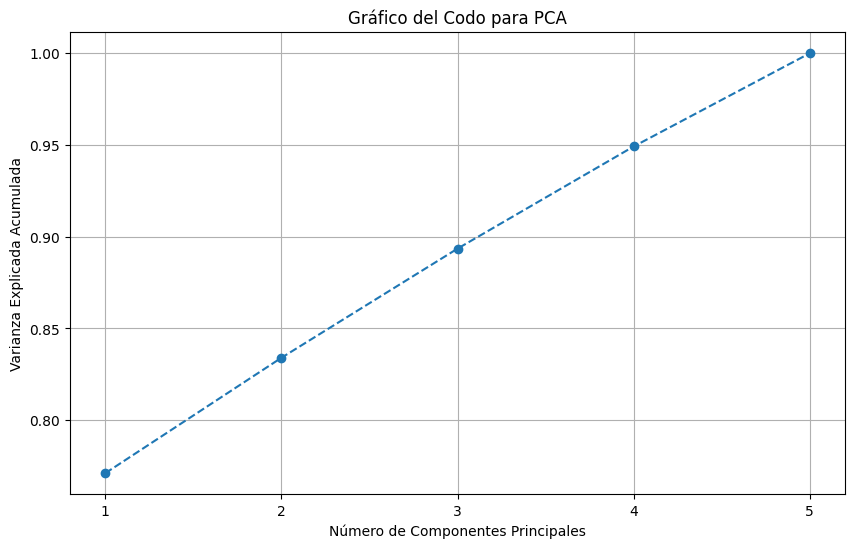

In [ ]:
# generate the plot for the previous code, the elbow plot, and show the loadings matrix

import matplotlib.pyplot as plt
# The loadings matrix was already calculated and printed in the previous code.
# We just need to display it again.
print("\nLoadings Matrix:")
print(loadings)

# The elbow plot was already generated in the previous code.
# It will display automatically if the environment allows (like Jupyter/Colab).
# If you need to explicitly show it again:
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Elbow Plot for PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, n_components + 1))
plt.grid(True)
plt.show()
